In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

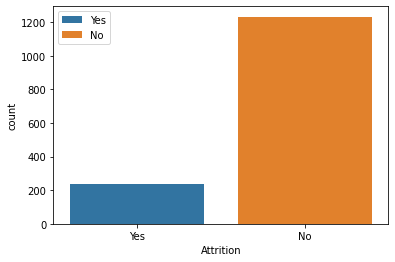

In [4]:
import seaborn as sns, matplotlib.pyplot as plt 
ax = sns.countplot(data=df, x="Attrition", hue='Attrition', dodge=False) 
ax.legend(loc="upper left") 
plt.show()

In [5]:
df['Attrition']=df.Attrition.map({
    'No': 0,
    'Yes': 1,
})

In [ ]:
# Categorical Variables
target = 'Attrition'
cat_vars = [var for var in df.columns if df[var].dtype == 'O' and var != target]

# There are few other categorical features which are not by default
# We will analyze those variables also
xtra_vars = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel' ,'JobSatisfaction',
             'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked',
             'StockOptionLevel', 'PercentSalaryHike', 'TrainingTimesLastYear']


cat_vars = cat_vars + xtra_vars
def plot_cat(var, dataframe):
    plt.figure(figsize=(16, 4))
    sns.countplot(x=var, hue=target, data=dataframe)
    plt.show()
for i in cat_vars:
    plot_cat(i, df)

In [7]:
import matplotlib.ticker as tkr
def func(x, pos):  # formatter function takes tick label and tick position
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

y_format = tkr.FuncFormatter(func)  # make formatter

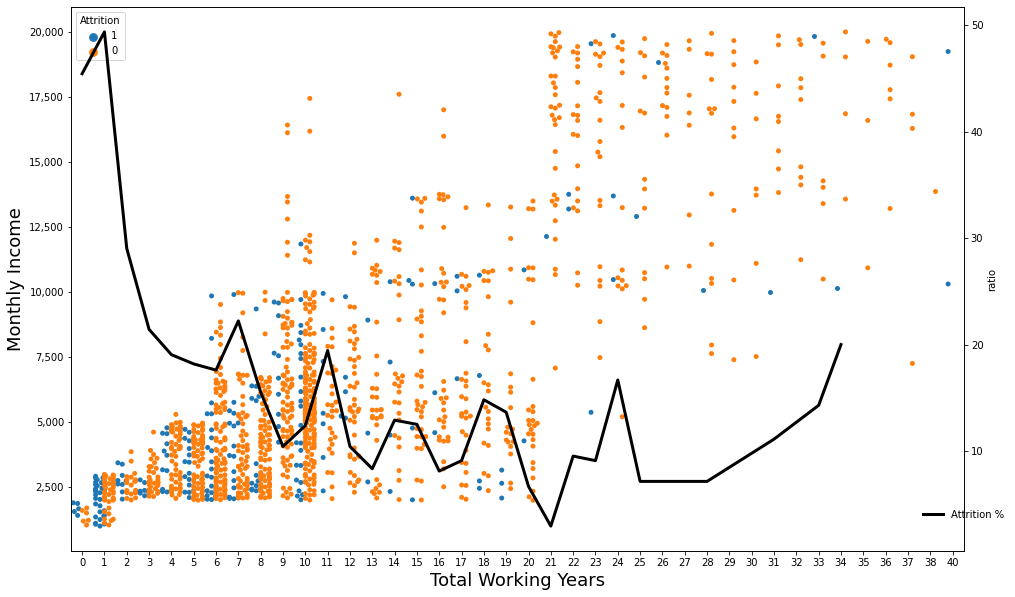

In [12]:
def get_ratio(df, cat_col):
    df['Attrition']=df['Attrition'].astype(str)
    attr_temp = df.groupby([cat_col, 'Attrition'])['EmployeeNumber'].count().unstack('Attrition').reset_index()

    attr_temp['ratio'] = round(attr_temp['1'] / (attr_temp['1'] + attr_temp['0']) * 100,2)
    attr_temp = attr_temp[[cat_col, 'ratio']]
    
    return attr_temp
plt.figure(figsize=(16,10))
g1 = sns.swarmplot(x='TotalWorkingYears', y= 'MonthlyIncome', 
                    dodge=True, hue='Attrition', data=df)
ax3 = g1.twinx()
attr_temp = get_ratio(df, 'TotalWorkingYears')
gg = sns.lineplot(x='TotalWorkingYears', y= 'ratio', ax=ax3, lw=3, markers='o',
             label="Attrition %", color='black',
             data=attr_temp)
gg.legend( loc = (.95, .05), frameon = False)
g1.set_xticklabels(g1.get_xticklabels(),rotation=0)
# g1.set_title("Total Working Years Distribution by Attrition and Monthly Income", fontsize=22)
g1.set_xlabel("Total Working Years", fontsize=18)
g1.set_ylabel("Monthly Income", fontsize=18)

g1.yaxis.set_major_formatter(y_format)

# g1.set_yticklabels(['{:,}'.format(int(x)) for x in g1.get_yticks().tolist()])

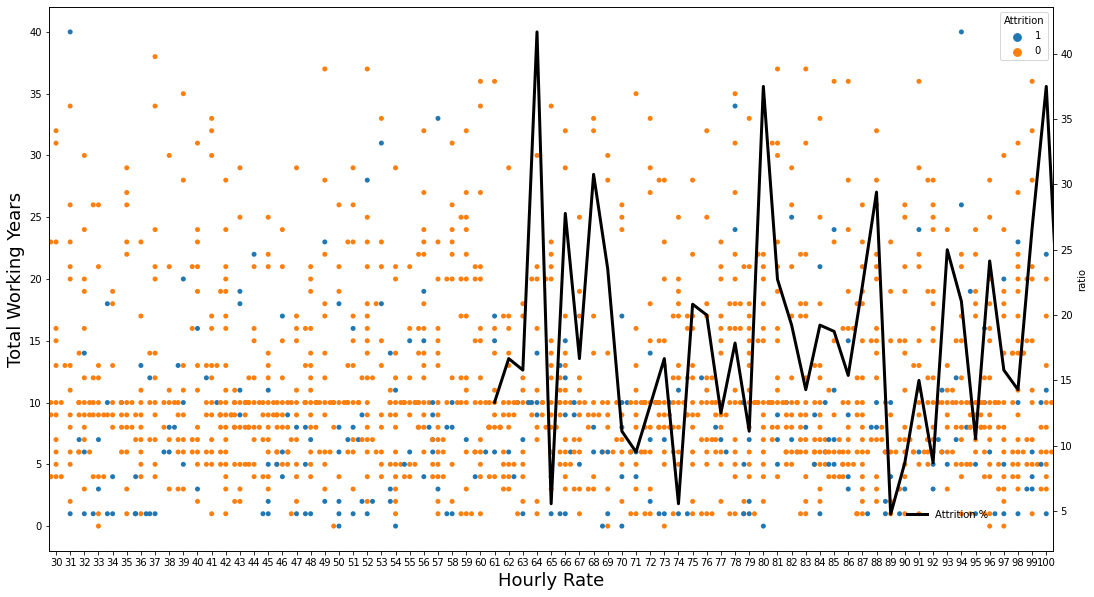

In [ ]:
plt.figure(figsize=(18,10))
g2 = sns.swarmplot(x='HourlyRate', y='TotalWorkingYears', hue='Attrition', data=df)
# g2.set_title("Hourly Rate Distribution by Attrition and Total Working Years", fontsize=22)
g2.set_xlabel("Hourly Rate", fontsize=18)
g2.set_ylabel("Total Working Years", fontsize=18)
g2.set_xticklabels(g2.get_xticklabels(),rotation=0)
ax4 = g2.twinx()
attr_temp = get_ratio(df, 'HourlyRate')
gg = sns.lineplot(x='HourlyRate', y= 'ratio', ax=ax4, lw=3, markers='o',
                  label="Attrition %", color='black',
                  data=attr_temp)

gg.legend( loc = (.85, .05), frameon = False)

In [ ]:
sns.lmplot(x = 'TotalWorkingYears', y = 'MonthlyIncome', data = df, col = 'Attrition')
plt.show()

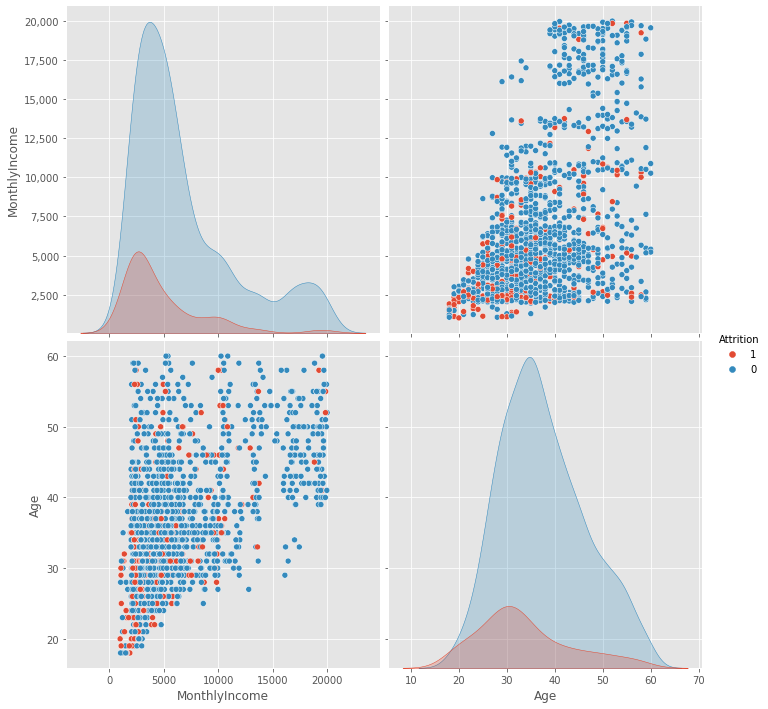

In [18]:
plt.style.use('ggplot')
import matplotlib.ticker as ticker
g = sns.pairplot(df, vars=["MonthlyIncome", "Age"],hue="Attrition",size=5)
# g.yaxis.set_major_formatter(y_format)

# g1.set_yticklabels(['{:,}'.format(int(x)) for x in g1.get_yticks().tolist()])
# xlabels = ['{:,.2f}'.format(x) + 'K' for x in g.get_xticks()/1000]
# g.set_yticklabels(['{:,}'.format(int(x)) for x in g.get_yticks().tolist()])

for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

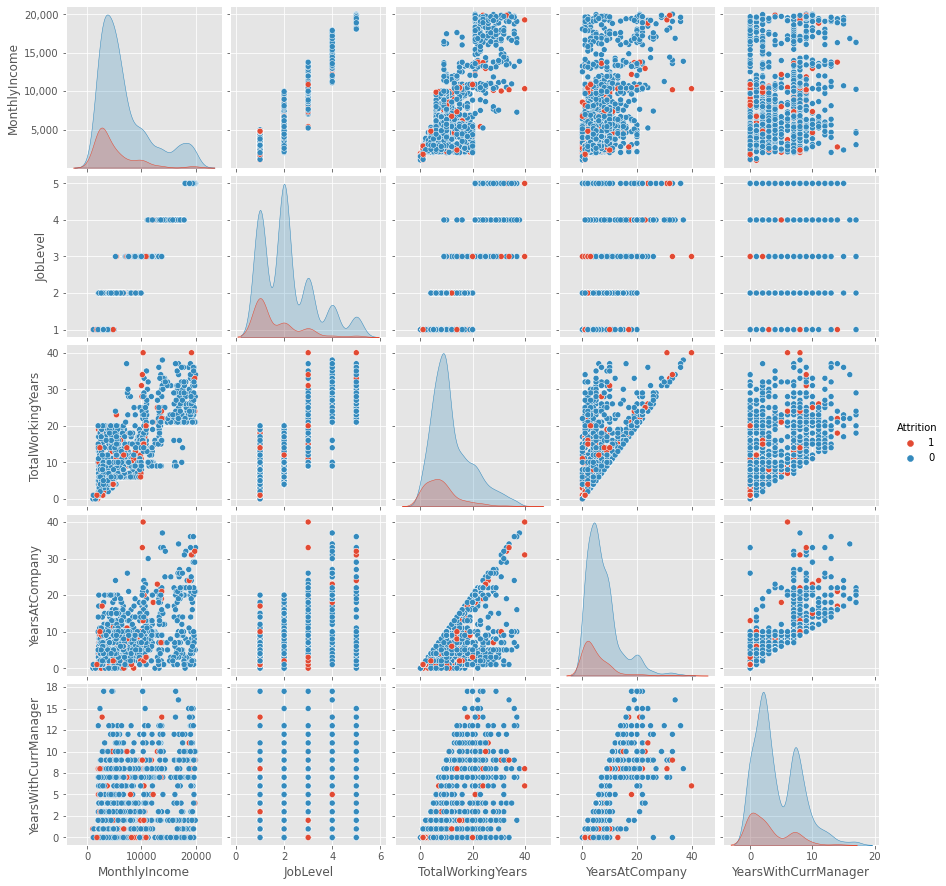

In [19]:
features = ['MonthlyIncome', 'Attrition', 'JobLevel', 'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager']
pairplot = sns.pairplot(df[features], diag_kind='kde', hue='Attrition')
# pairplot.yaxis.set_major_formatter(y_format)

for ax in pairplot.axes.flat:
    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.show()

# Model Building

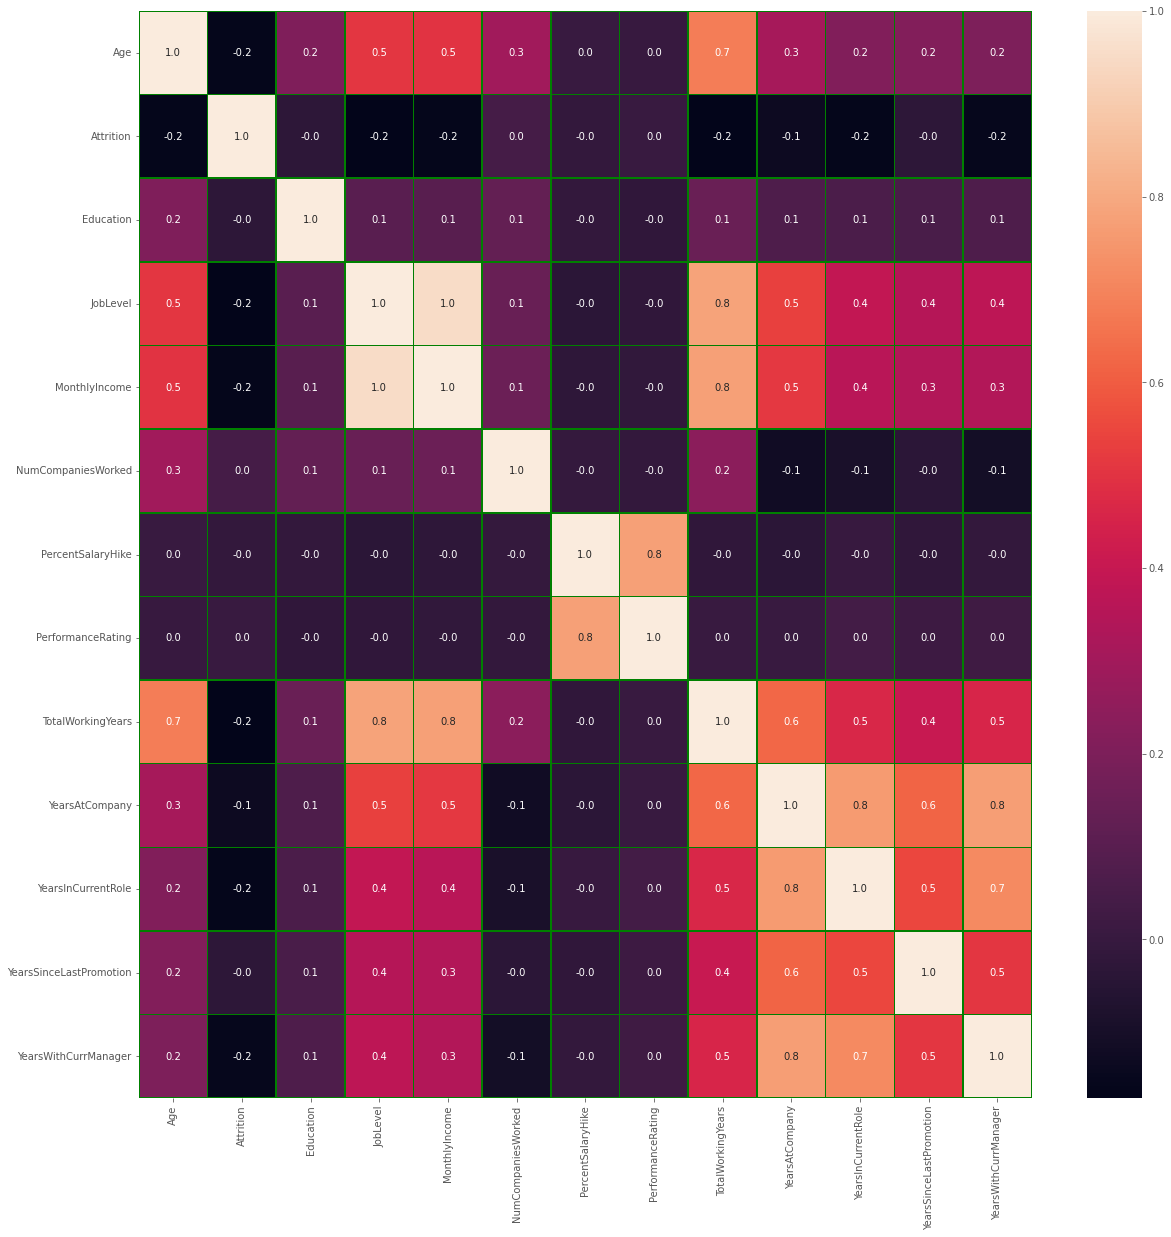

In [ ]:
# import numpy as np
# corr=df.corr()
# m = ~(corr.mask(np.eye(len(corr), dtype=bool)).abs() > 0.1).any()
# raw = corr.loc[m, m]
# m

df.drop(["DailyRate",'DistanceFromHome','EmployeeCount','EmployeeNumber','EnvironmentSatisfaction',
         'HourlyRate','JobInvolvement','JobSatisfaction','MonthlyRate','RelationshipSatisfaction',
         'StandardHours','StockOptionLevel','TrainingTimesLastYear','WorkLifeBalance'
         ], axis=1,inplace=True)
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor="green",fmt=".1f",ax=ax)
plt.show()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Attrition']=le.fit_transform(df['Attrition'])
df['OverTime']=le.fit_transform(df['OverTime'])
df['Over18']=le.fit_transform(df['Over18'])
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohc = OneHotEncoder(sparse=False, drop='first')

ohc_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
ohc_data = ohc.fit_transform(df[ohc_cols].values)

ohc_df = pd.DataFrame(ohc_data, columns=ohc.get_feature_names())
df = df.drop(columns=ohc_cols, axis=1)
df = pd.concat([df, ohc_df], axis=1)

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition'].values
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_resample,y_resample=sm.fit_resample(X,y)
y_resample=pd.DataFrame(y_resample)
X_resample=pd.DataFrame(X_resample)
fdf = pd.concat([X_resample, y_resample], axis=1)
fdf.set_axis([*fdf.columns[:-1], 'Attrition'], axis=1, inplace=True)

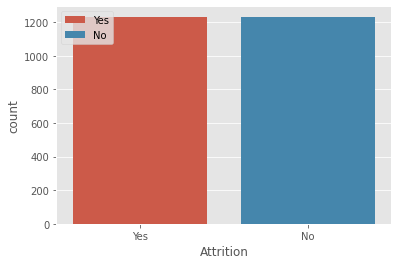

In [ ]:
import seaborn as sns, matplotlib.pyplot as plt 
ax = sns.countplot(data=fdf, x="Attrition", hue='Attrition', dodge=False) 
ax.set_xticklabels(['Yes','No'])
L=ax.legend(loc="upper left") 
L.get_texts()[0].set_text('Yes')
L.get_texts()[1].set_text('No')
plt.show()

In [ ]:
X = fdf.drop('Attrition', axis=1)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Y = fdf['Attrition'].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15)

# with hyper parameter tunning

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("SVC")
svm = SVC(kernel='poly', C=9.0, random_state=500)
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
kf = KFold(n_splits=5, shuffle=True)
score = cross_val_score(svm, X, Y, cv= kf, scoring="accuracy")
print(f'Average score: {"{:.2f}".format(score.mean())}')

SVC
0.8702702702702703
              precision    recall  f1-score   support

           0       0.90      0.83      0.86       183
           1       0.84      0.91      0.88       187

    accuracy                           0.87       370
   macro avg       0.87      0.87      0.87       370
weighted avg       0.87      0.87      0.87       370

Average score: 0.88


In [ ]:
from sklearn.linear_model import LogisticRegression
# 2. instantiate a logistic regression model
print("LR")
logreg = LogisticRegression(solver='saga',random_state=1000,multi_class='multinomial',C=9.0)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
score = cross_val_score(logreg, X, Y, cv= kf, scoring="accuracy")
print(f'Average score: {"{:.2f}".format(score.mean())}')

LR
0.7243243243243244
              precision    recall  f1-score   support

           0       0.76      0.68      0.72       193
           1       0.69      0.77      0.73       177

    accuracy                           0.72       370
   macro avg       0.73      0.73      0.72       370
weighted avg       0.73      0.72      0.72       370

Average score: 0.74


In [ ]:
from sklearn.tree import DecisionTreeClassifier
etc = DecisionTreeClassifier(max_depth=300)
print("DT")
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
score = cross_val_score(etc, X, Y, cv= kf, scoring="accuracy")
print(f'Average score: {"{:.2f}".format(score.mean())}')

DT
0.8378378378378378
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       193
           1       0.82      0.84      0.83       177

    accuracy                           0.84       370
   macro avg       0.84      0.84      0.84       370
weighted avg       0.84      0.84      0.84       370

Average score: 0.84


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=300, random_state=5, max_depth=300)
print("ExtraTreesClassifier")
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
print(round(accuracy_score(y_test,y_pred),2))
print(classification_report(y_test,y_pred))
# print(confusion_matrix(y_test,y_pred))
score = cross_val_score(etc, X, Y, cv= kf, scoring="accuracy")
print(f'Average score: {"{:.2f}".format(score.mean())}')

ExtraTreesClassifier
0.93
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       193
           1       0.94      0.92      0.93       177

    accuracy                           0.93       370
   macro avg       0.93      0.93      0.93       370
weighted avg       0.93      0.93      0.93       370

Average score: 0.93


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

precision_score, recall_score, f1_score ,_ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Precision:", round(precision_score,2))

print("Recall:", round(recall_score,2))

print("F1:", round(f1_score,2))

Precision: 0.93
Recall: 0.93
F1: 0.93


In [ ]:
from sklearn.metrics import log_loss
print('Log_loss: {}'.format(log_loss(y_test, y_pred)))

Log_loss: 2.3337248795797283


In [ ]:
from sklearn.metrics import roc_auc_score
round(roc_auc_score(y_test, y_pred),2)

0.93

In [ ]:
!pip install plot_metric

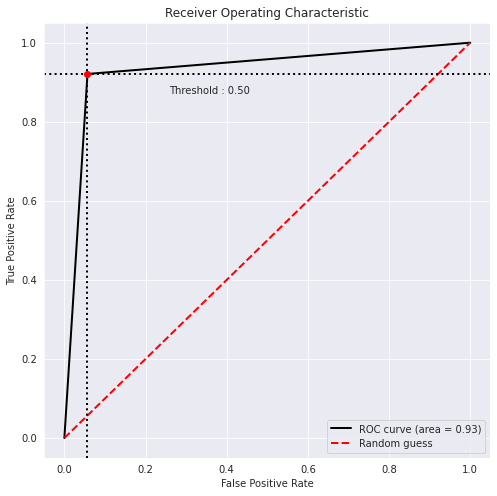

In [ ]:
from plot_metric.functions import BinaryClassification
import matplotlib.pyplot as plt 
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])
plt.figure(figsize=(8,8))
bc.plot_roc_curve()
plt.show()

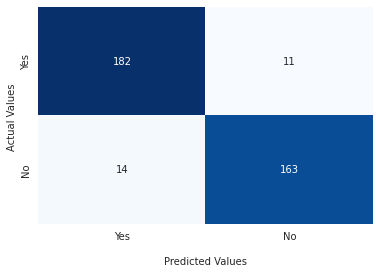

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cf_matrix,cbar=False,annot=True,cmap="Blues",fmt="d")
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Yes','No'])
ax.yaxis.set_ticklabels(['Yes','No'])
## Display the visualization of the Confusion Matrix.
plt.show()